Different morphologies of the same neuron type might require different activation to reach comparable firing frequency. InputScaling simulates a network of a neuron type with different number of inputs, and different frequency to infer what level of input is needed.

Here we look at the input to ```neuron_types="fs"```.

During a simulation we can vary the input frequency, but not the number of inputs coupled to a neuron, so we use a set of ```num_replicas``` copies of each morphology, each receiving a different number of inputs from ```num_input_min``` to ```num_input_max``` of a given ```input_type``` (e.g. for striatum "cortical" or "thalamic"). Note that if 100 inputs are requested, then on average 100 inputs will be placed, but the number can vary as the placement is random.

A set of input frequencies are tested, specified by ```input_frequency_range```, and each of these frequencies is run for ```input_duration``` seconds. In this example we create a small example, but we recommend that use use a longer input duration (e.g. 10 seconds, or possibly more).

The user can specify ```parameter_id```, ```morphology_id``` and (neuron) ```modulation_id``` to be used for the neuron model. Each parameter_id can have multiple morphologies associated with it. This means that  ```parameter_id=0, morphology_id=0``` might refer to a different morphology than ```parameter_id=1, morphology_id=0```. Since ```morphology_id=0``` simply means the first morphology in the list of available morphologies for a given ```parameter_id```.

In [1]:
import os
BGD_path = os.path.join("..","..","..","BasalGangliaData", "data")
if os.path.isdir(BGD_path):
    print(f"Using SNUDDA_DATA={BGD_path}")
    os.environ["SNUDDA_DATA"] = BGD_path

from snudda.input.input_tuning import InputTuning
network_path = os.path.join("networks", "input_tuning_FS_ALL")
input_tuning = InputTuning(network_path)

Using SNUDDA_DATA=../../../BasalGangliaData/data


We create a network without any synapses and connect different number of external inputs to the neurons. Each neuron then receives a range of input frequencies. Here ```neurons_path``` points to the folder that contains all the different neuron types. Note that we use ```$DATA``` to refer to the ```snudda/data``` folder, but you can use an absolute path instead if you have your own neurons folder. If you use your own neurons you probably want to compile the neuron mechanisms from another folder when calling ```nrnivmodl``` below.

Also note that the folder names for the different neurons must be lowercase.

In [3]:
neurons_path = os.path.join("$DATA", "neurons", "striatum")
input_tuning.setup_network(neurons_path=neurons_path, 
                           num_replicas=2,  # 10
                           neuron_types="fs")
input_tuning.setup_input(input_type="cortical",  # eg. "cortical" or "thalamic"
                         num_input_min=10,
                         num_input_max=200, #500
                         input_duration=1.0, #2.0
                         input_frequency_range=[1.0, 5.0]) #[1.0, 2.0, 3.0, 5.0, 10.0])

Skipping neuron type lts
Skipping neuron type dspn
Skipping neuron type ispn
Skipping neuron type chin
Found 225 neuron models in /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Writing network config file to networks/input_tuning_FS_ALL/network-config.json
No d_view specified, running distribute neurons in serial
No connections specified in connectivity_distribution.
Using cortical synapse density for input.
Loading 450 neurons with 0 synapses and 0 gap junctions
Writing spikes to networks/input_tuning_FS_ALL/input.hdf5


In [ ]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

## For large runs, to simulate in parallel use:

```
export SNUDDA_DATA=../../../BasalGangliaData/data
mpiexec -n 4 python3 ../../snudda/input/input_tuning.py simulate networks/input_tuning_FS_ALL/
```

If you have more than four cores available on your machine, increase the number of workers accordingly.

## Below we just run it in serial in the notebook:

In [ ]:
input_tuning.simulate()

## Analyse results

Loading 450 neurons with 0 synapses and 0 gap junctions


<IPython.core.display.Javascript object>


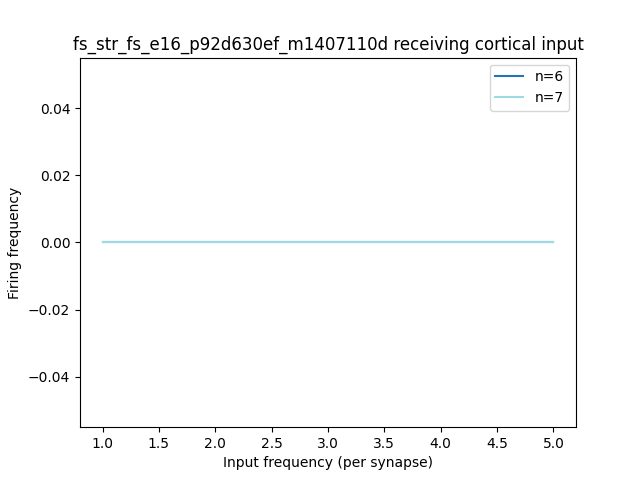

<IPython.core.display.Javascript object>


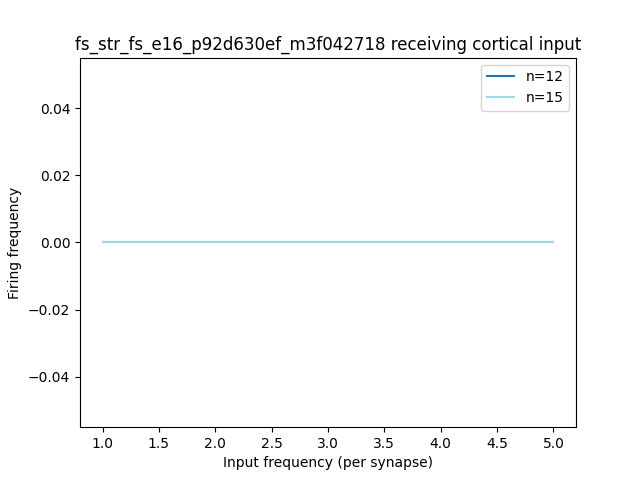

<IPython.core.display.Javascript object>


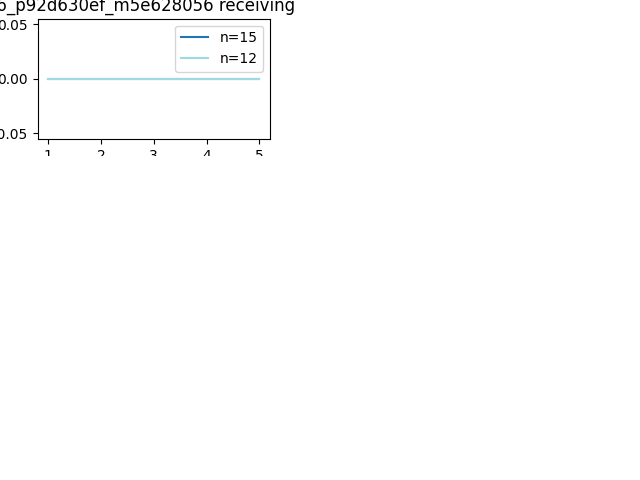

<IPython.core.display.Javascript object>


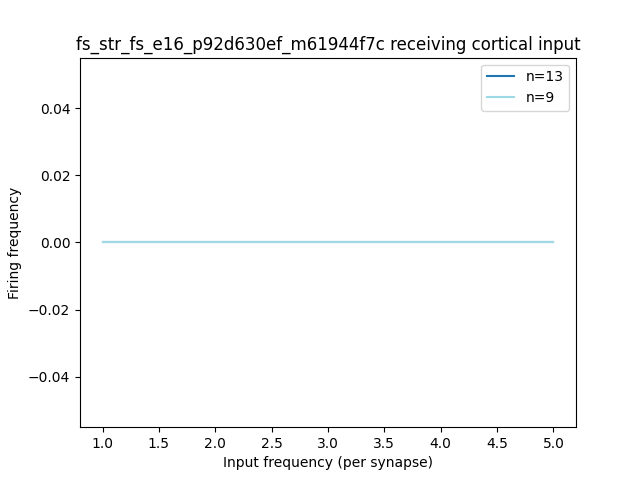

<IPython.core.display.Javascript object>


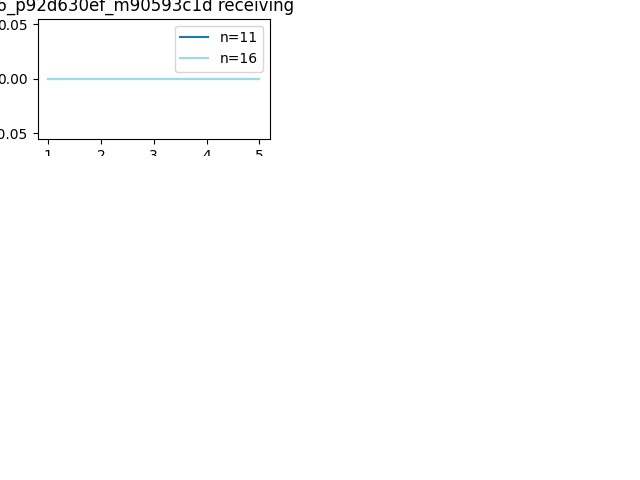

<IPython.core.display.Javascript object>


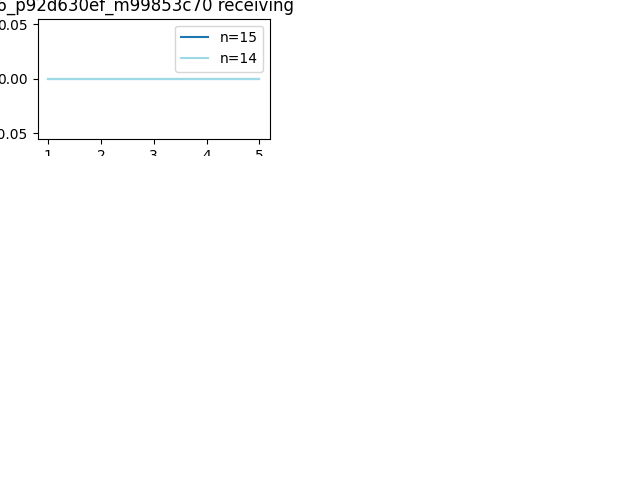

<IPython.core.display.Javascript object>


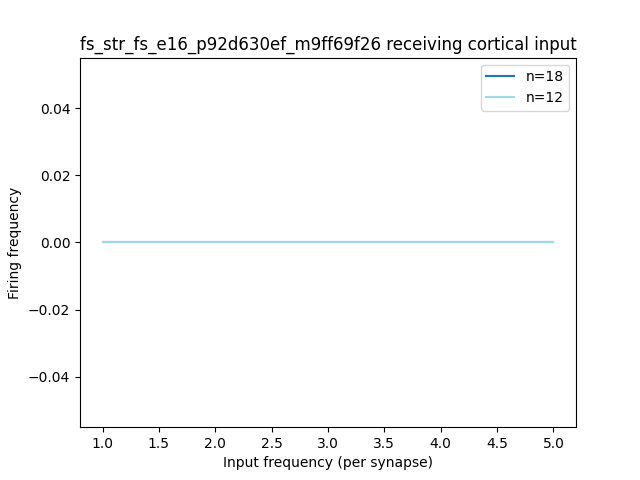

<IPython.core.display.Javascript object>


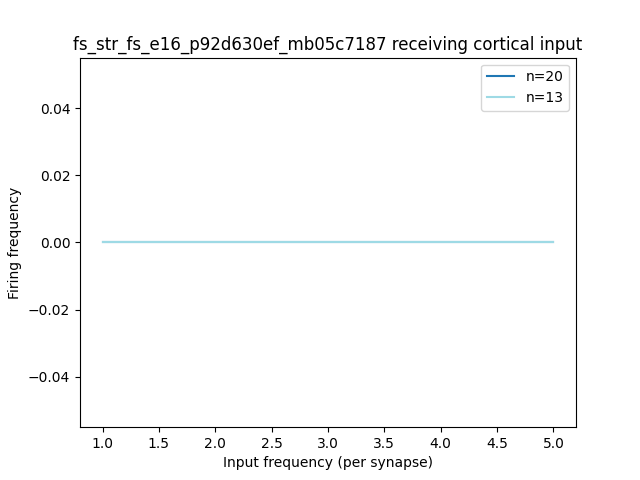

<IPython.core.display.Javascript object>


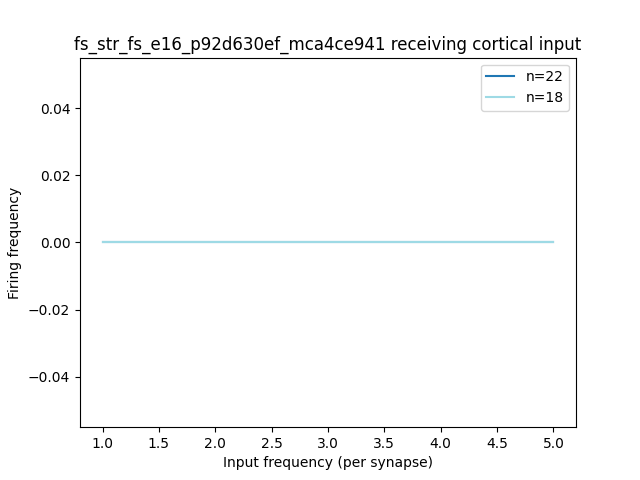

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


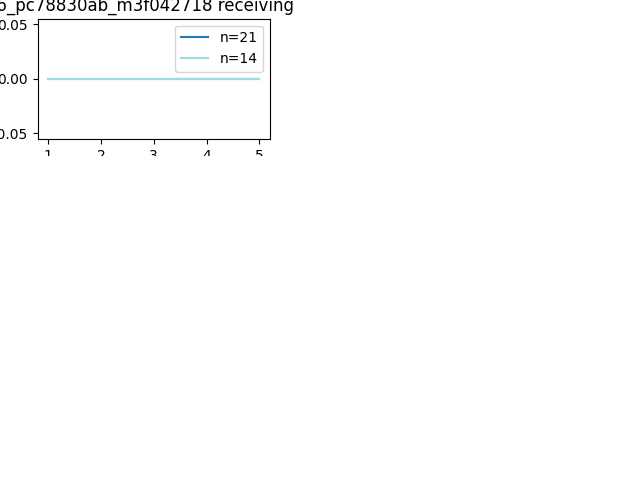

<IPython.core.display.Javascript object>


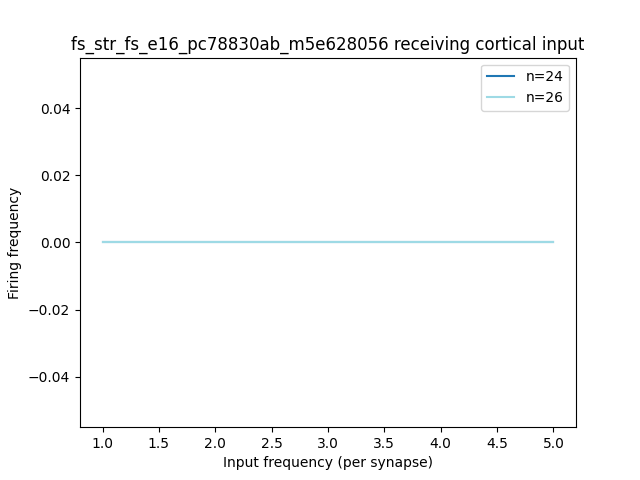

<IPython.core.display.Javascript object>


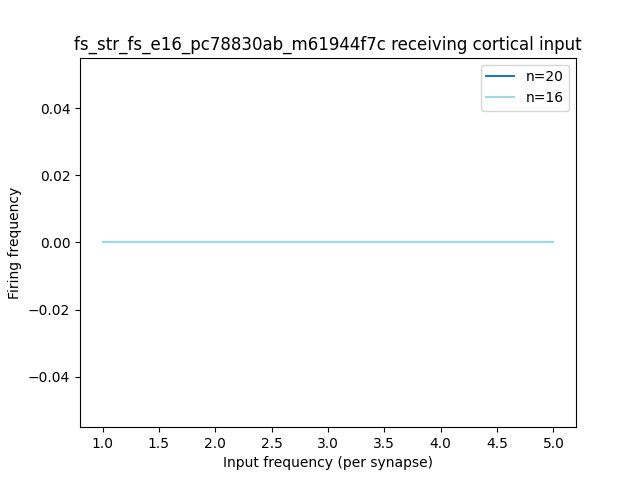

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


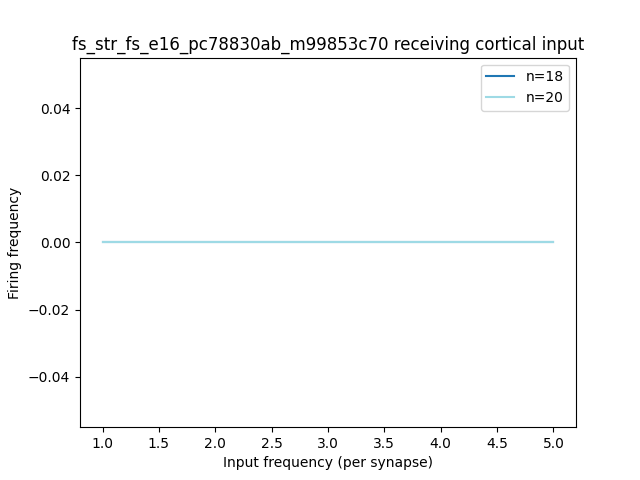

<IPython.core.display.Javascript object>


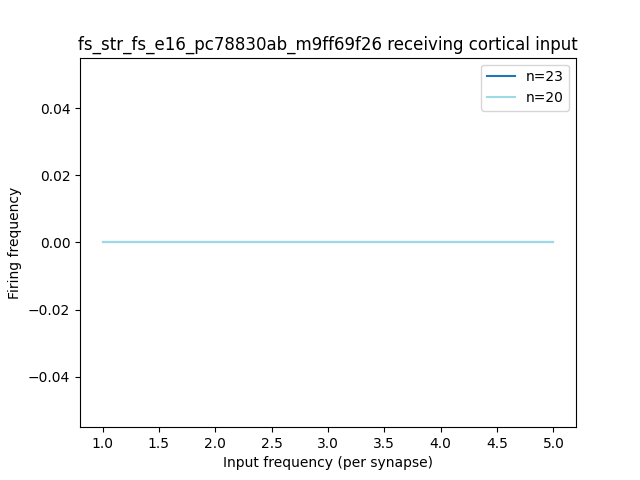

<IPython.core.display.Javascript object>


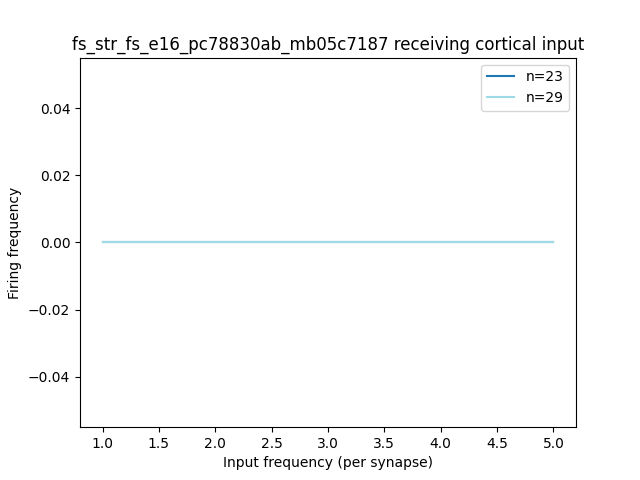

<IPython.core.display.Javascript object>


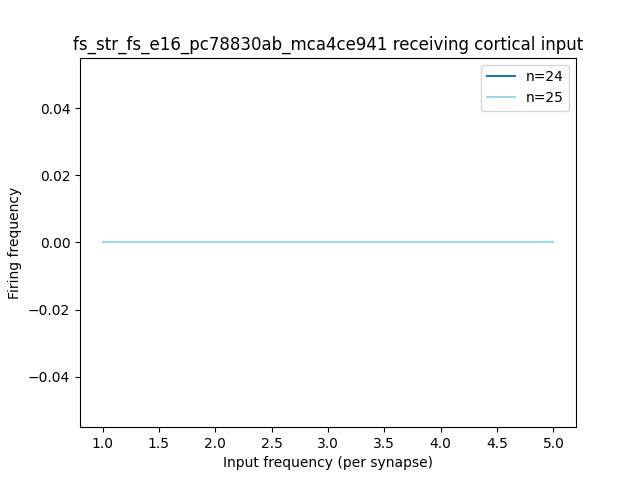

<IPython.core.display.Javascript object>


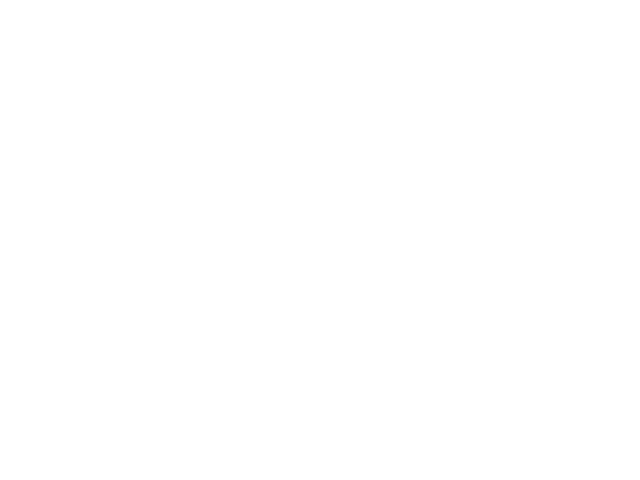

<IPython.core.display.Javascript object>


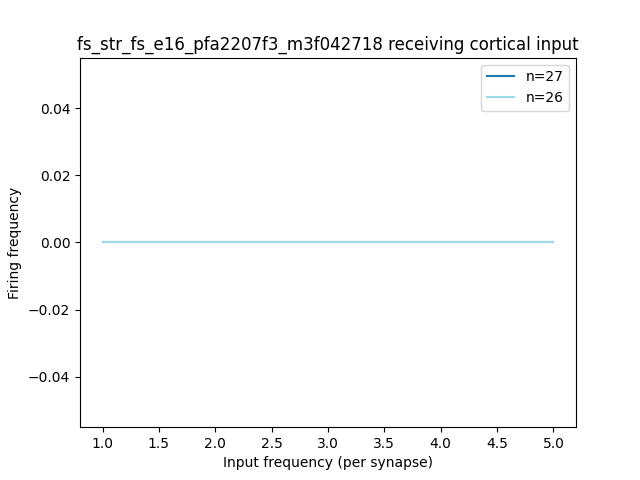

/home/hjorth/HBP/Snudda/snudda/input/input_tuning.py:403: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


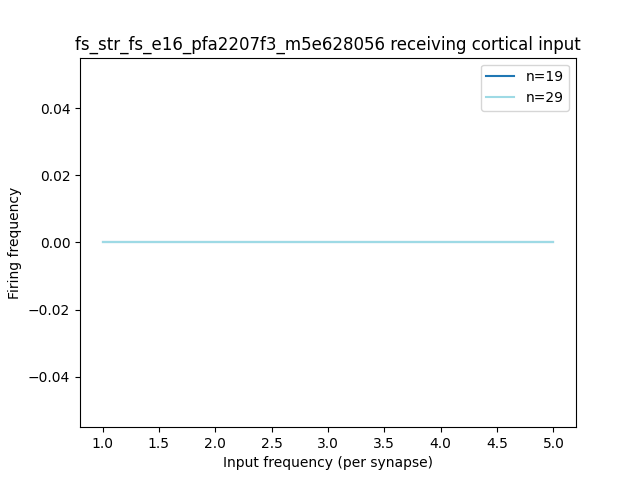

<IPython.core.display.Javascript object>


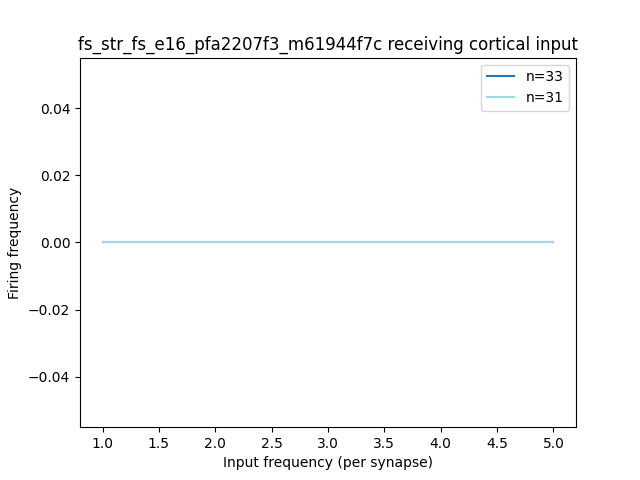

<IPython.core.display.Javascript object>


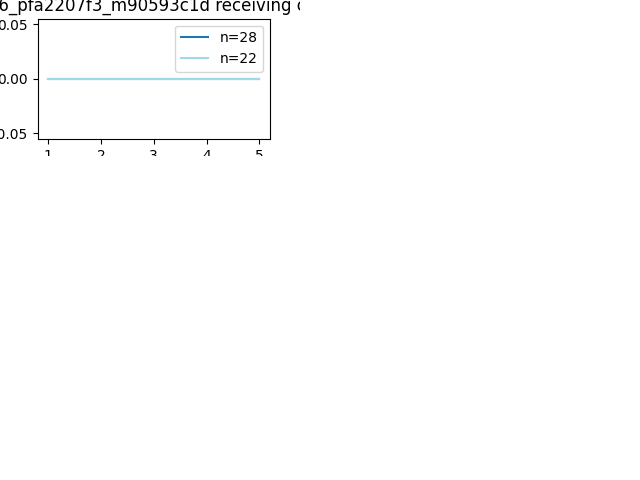

<IPython.core.display.Javascript object>


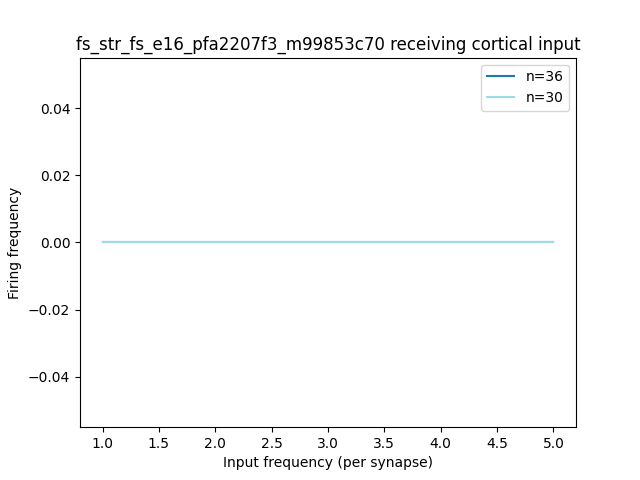

<IPython.core.display.Javascript object>


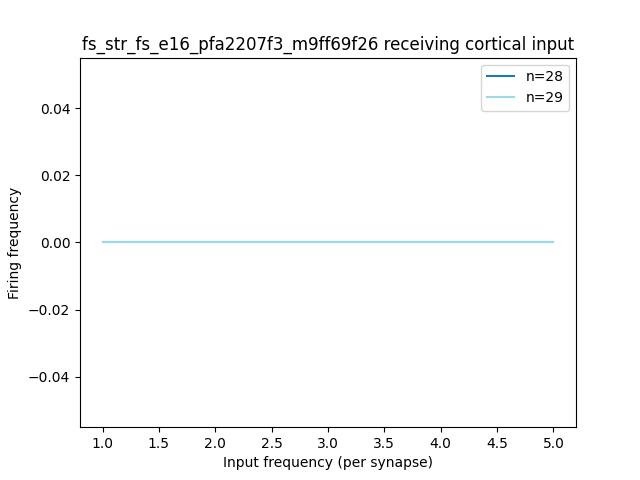

<IPython.core.display.Javascript object>


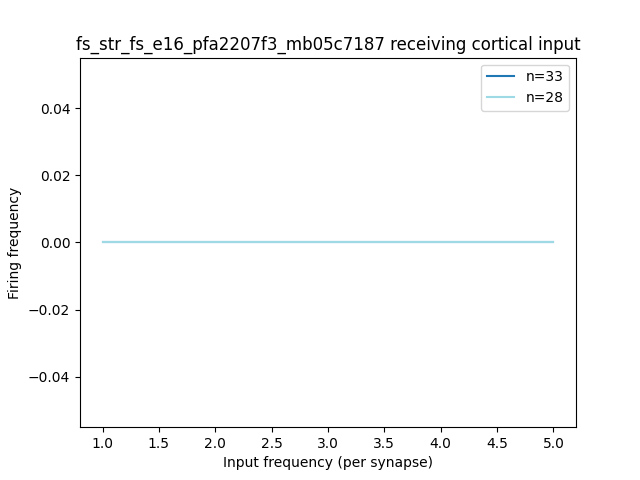

<IPython.core.display.Javascript object>


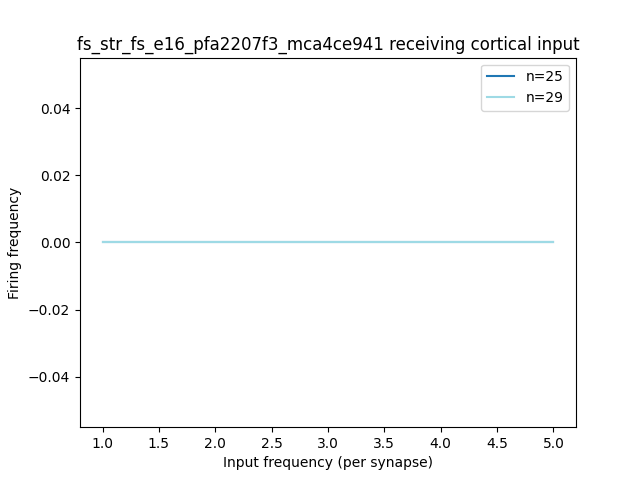

<IPython.core.display.Javascript object>


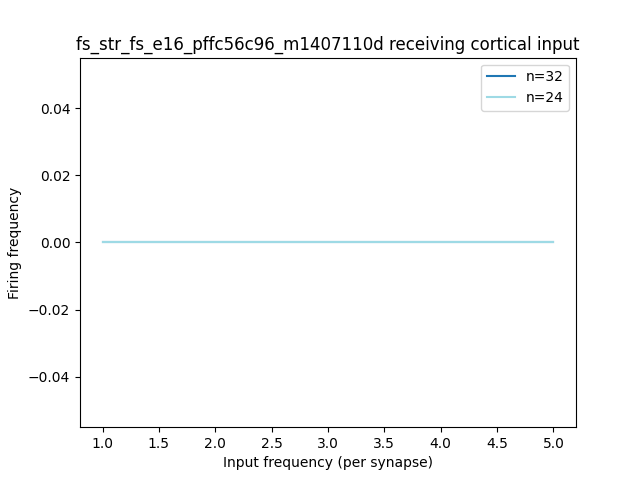

<IPython.core.display.Javascript object>


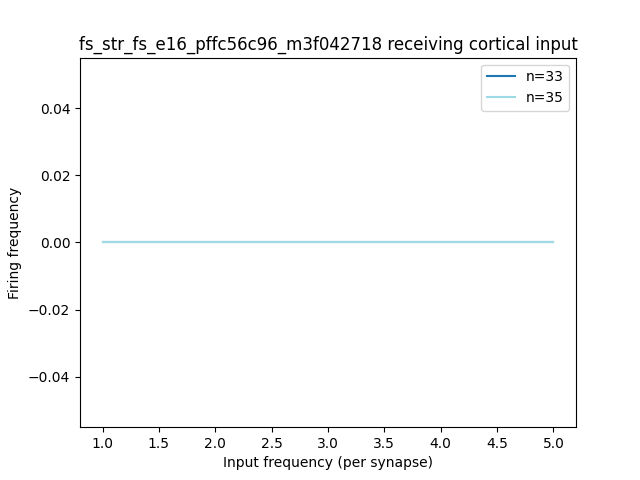

<IPython.core.display.Javascript object>


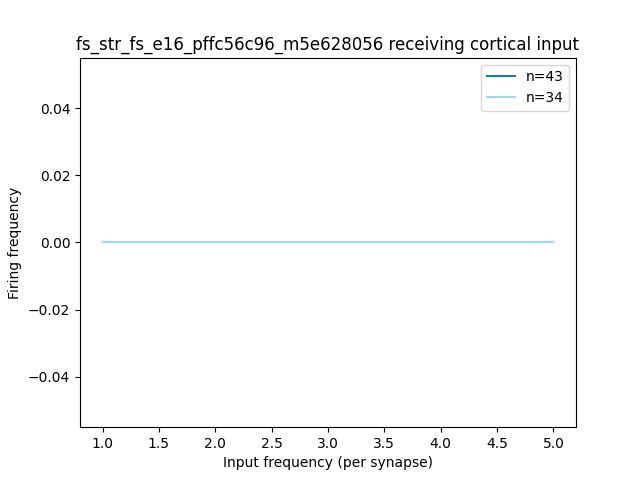

<IPython.core.display.Javascript object>


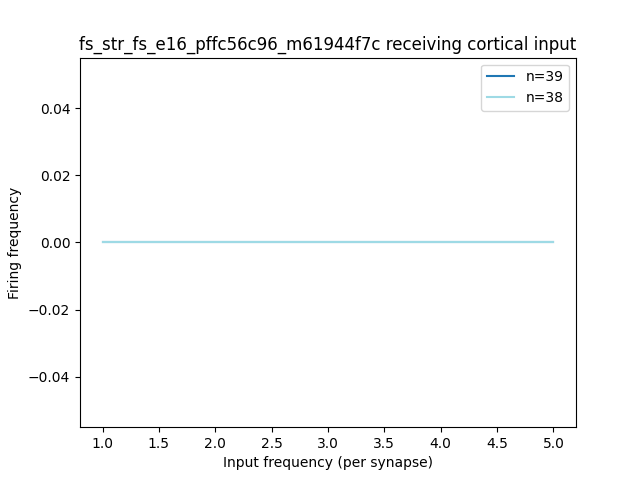

<IPython.core.display.Javascript object>


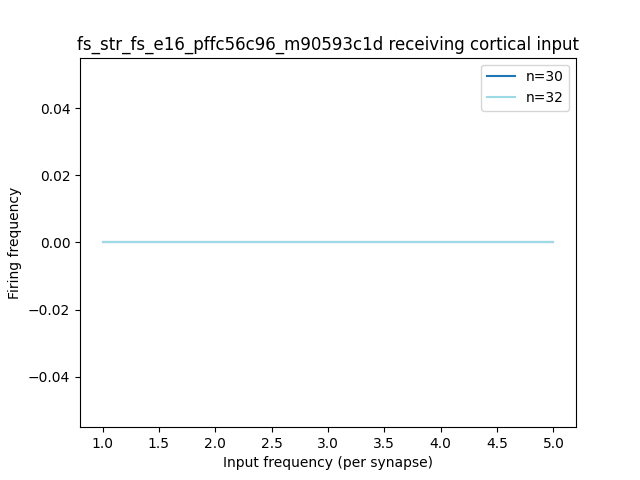

<IPython.core.display.Javascript object>


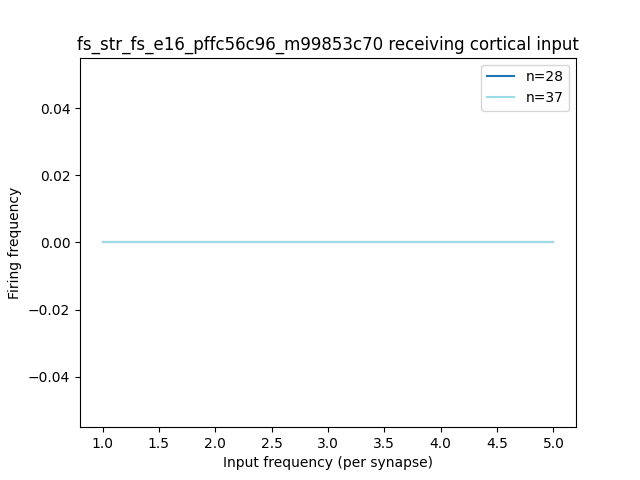

<IPython.core.display.Javascript object>


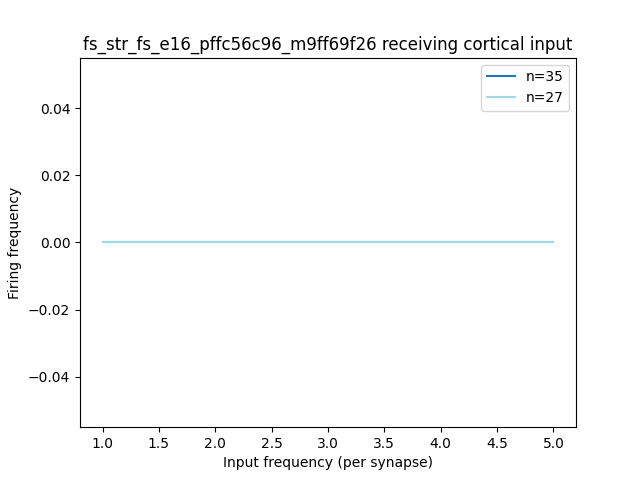

<IPython.core.display.Javascript object>


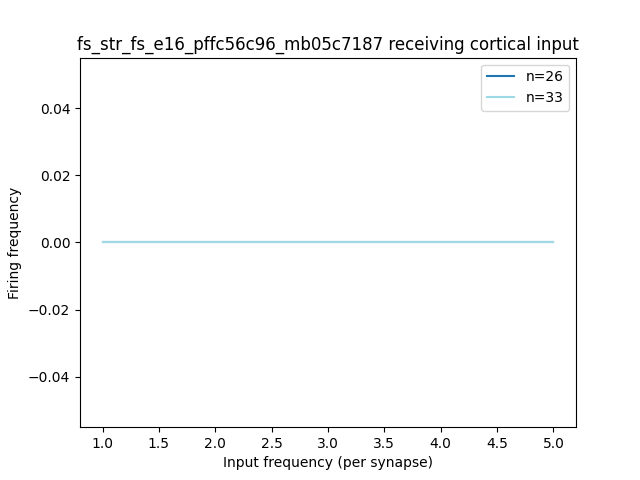

<IPython.core.display.Javascript object>


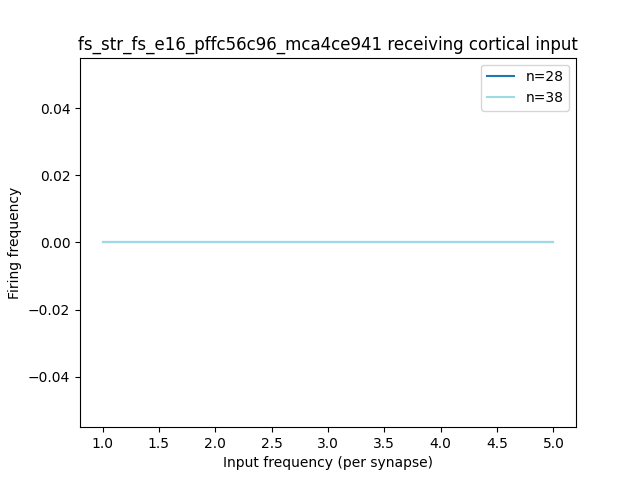

<IPython.core.display.Javascript object>


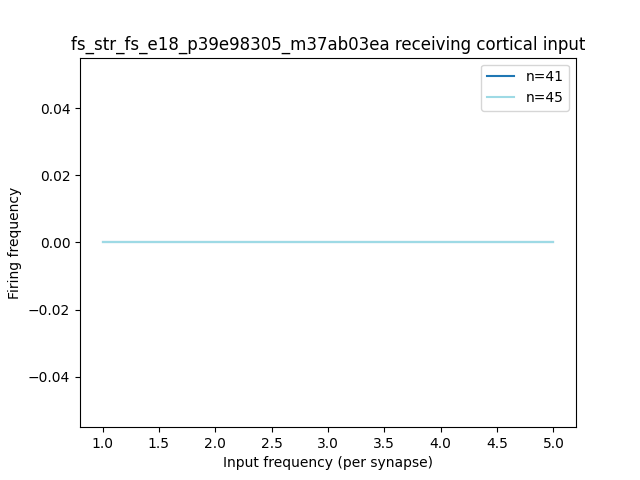

<IPython.core.display.Javascript object>


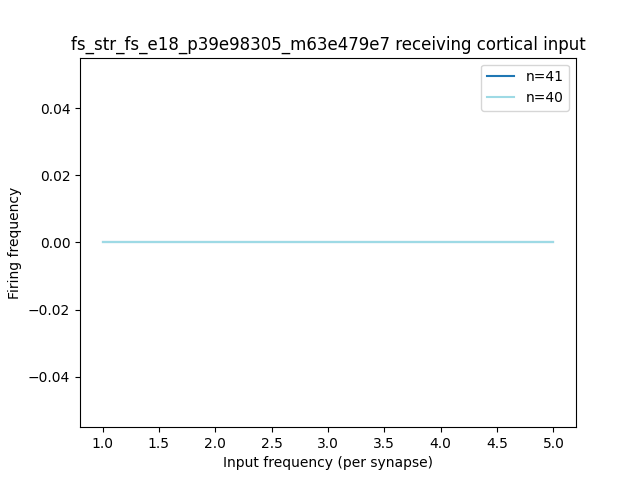

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


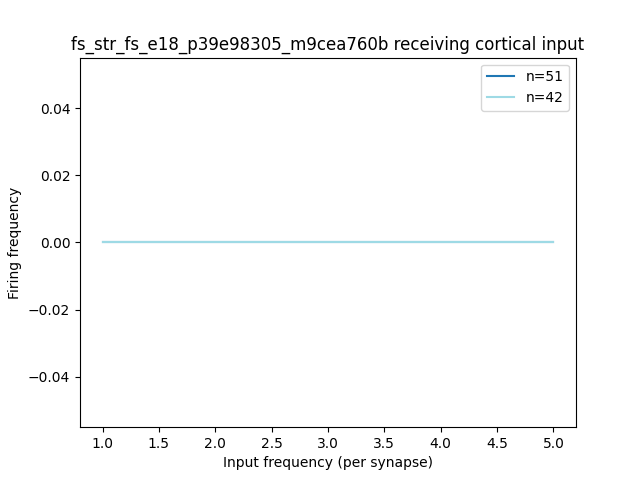

<IPython.core.display.Javascript object>


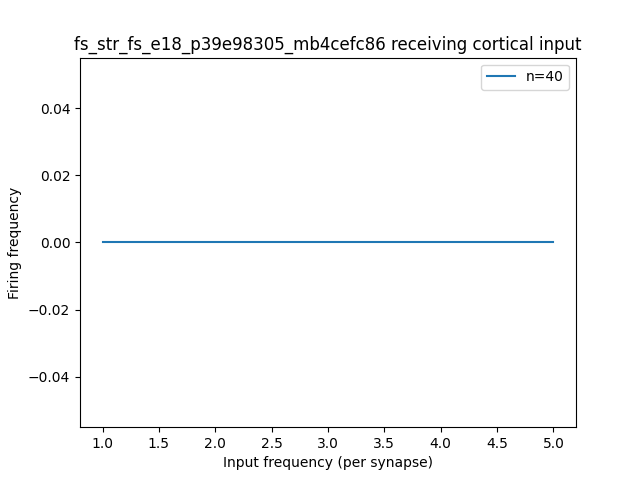

<IPython.core.display.Javascript object>


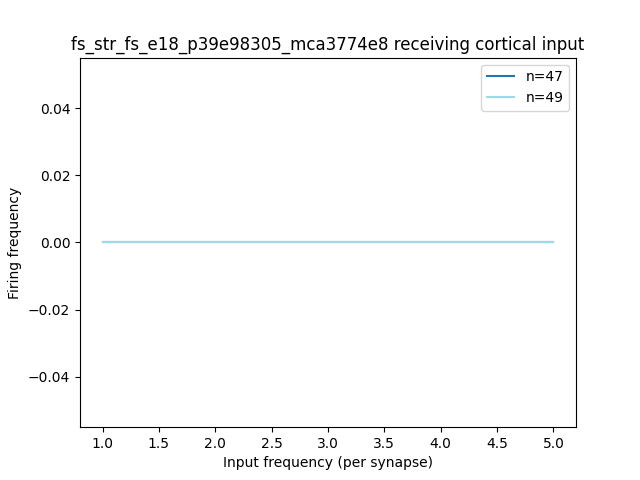

<IPython.core.display.Javascript object>


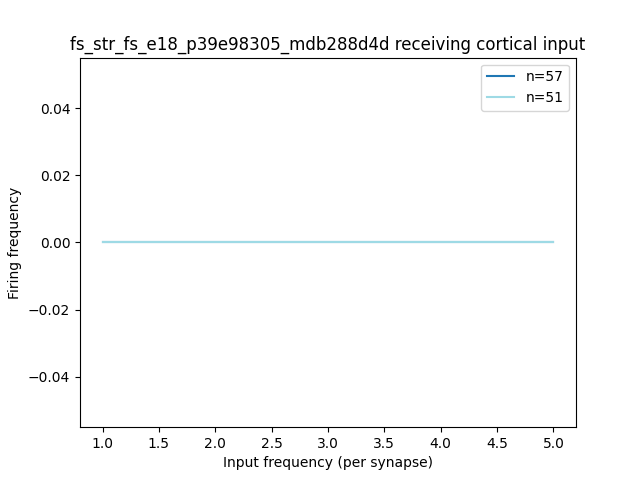

<IPython.core.display.Javascript object>


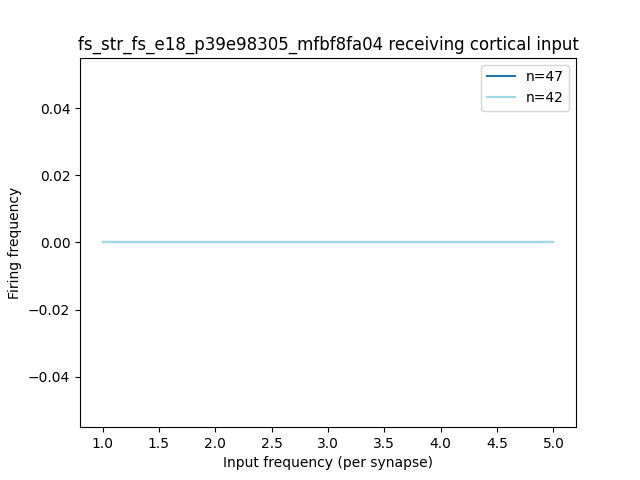

<IPython.core.display.Javascript object>


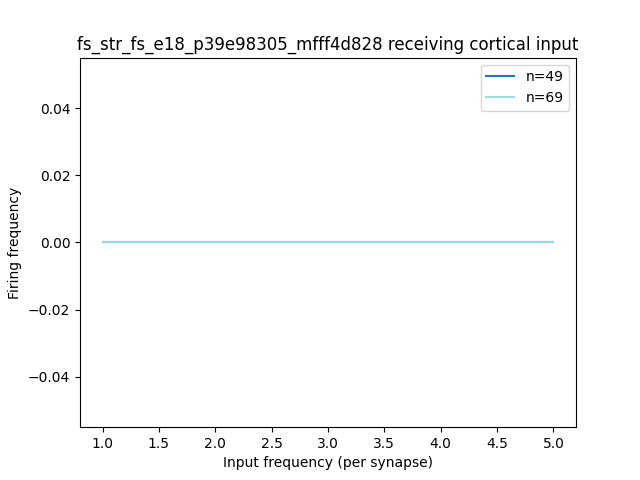

<IPython.core.display.Javascript object>


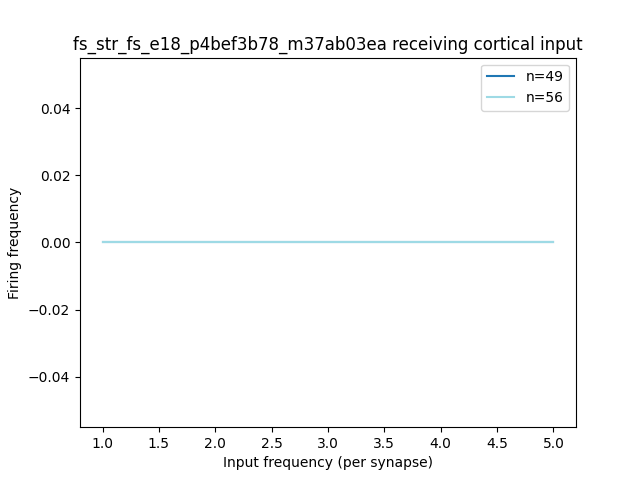

<IPython.core.display.Javascript object>


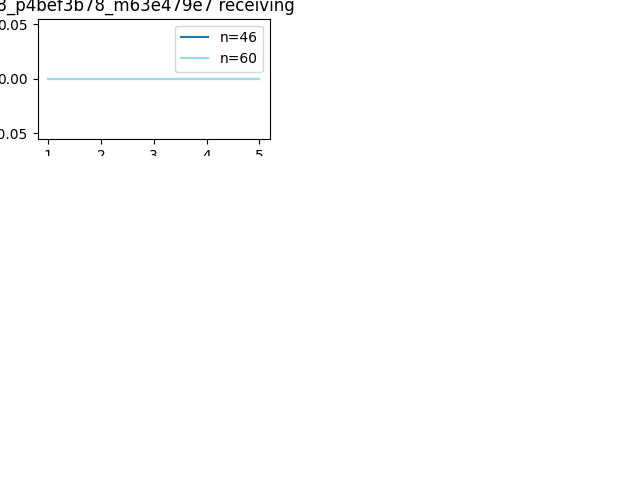

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
%matplotlib notebook

input_tuning.analyse_results(show_plots=True)